NYC Taxi duration analysis from Kaggle

In [1]:
'''
Part 3

In this notebook I:
Run linear regression
'''

'\nPart 3\n\nIn this notebook I:\nRun linear regression\n'

In [2]:
kaggle_url = 'https://www.kaggle.com/c/nyc-taxi-trip-duration'

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\liamk\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
txdata = pd.read_csv('edit_2.csv',index_col=0)

txdata.head()

C:\Users\liamk\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,passenger_count,distance,Tues,Wed,Thu,Fri,Sat,Sun,t01,t02,...,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23
0,1,1.502172,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1.808660,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6.379687,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.483632,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,1.187038,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# get target column as series

txtarget = pd.Series.from_csv('target.csv')

txtarget.head()

C:\Users\liamk\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


0     455
1     663
2    2124
3     429
4     435
dtype: int64

In [8]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(txdata, txtarget)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1093917, 31) (364639, 31) (1093917,) (364639,)


In [9]:
# start ML

lreg = LinearRegression()

In [10]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)

In [17]:
print ('Fit a model x_train, and  calculate the MSE with x_test and y_test: %.2f' 
      %np.mean((y_test - pred_test)**2))

Fit a model x_train, and  calculate the MSE with x_test and y_test: 8600467.70


In [18]:
print ('Fit a model x_train, and  calculate the MSE with y_train: %.2f' 
      %np.mean((y_train - pred_train)**2))

Fit a model x_train, and  calculate the MSE with y_train: 10148512.62


Text(0.5,1,'Residual Plots')

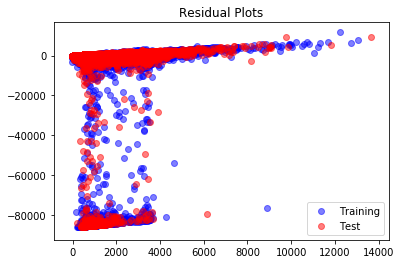

In [14]:
train = plt.scatter(pred_train,(pred_train - y_train),
                   c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - y_test),
                  c='r',alpha=0.5)

plt.legend((train,test),('Training','Test'),loc='best')

plt.hlines(y=0,xmin=0,xmax=40)

plt.title('Residual Plots')

Below is the original Residual Plot without outliers removed via notebook 1.5

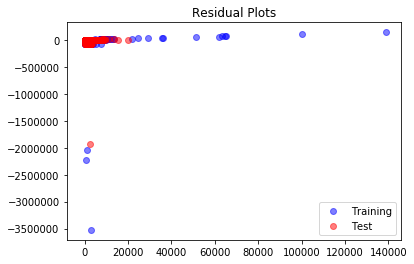

In [31]:
# ML attempt 2 without weekday and hour categoeries

In [23]:
txdata2 = pd.concat([txdata['passenger_count'],txdata['distance']],axis=1)

txdata2.head()

,passenger_count,distance
0,1,1.502172
1,1,1.808660
2,1,6.379687
3,1,1.483632
4,1,1.187038


In [24]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(txdata2, txtarget)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1093917, 2) (364639, 2) (1093917,) (364639,)


In [25]:
lreg = LinearRegression()

In [26]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
pred_train = lreg.predict(x_train)
pred_test = lreg.predict(x_test)

In [28]:
print ('Fit a model x_train, and  calculate the MSE with x_test and y_test: %.2f' 
      %np.mean((y_test - pred_test)**2))

Fit a model x_train, and  calculate the MSE with x_test and y_test: 9914004.12


In [29]:
print ('Fit a model x_train, and  calculate the MSE with y_train: %.2f' 
      %np.mean((y_train - pred_train)**2))

Fit a model x_train, and  calculate the MSE with y_train: 9731371.81


Text(0.5,1,'Residual Plots')

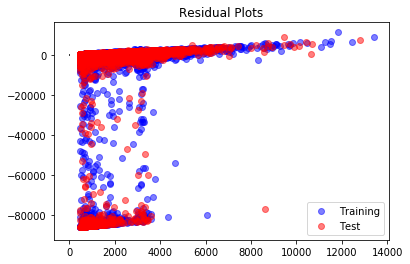

In [30]:
train = plt.scatter(pred_train,(pred_train - y_train),
                   c='b',alpha=0.5)

test = plt.scatter(pred_test,(pred_test - y_test),
                  c='r',alpha=0.5)

plt.legend((train,test),('Training','Test'),loc='best')

plt.hlines(y=0,xmin=0,xmax=40)

plt.title('Residual Plots')